# Feature Scaling

Real Life Datasets have many features with a wide range of values like for example let’s consider the house price prediction dataset. It will have many features like no. of. bedrooms, square feet area of the house, etc.

As you can guess, the no. of bedrooms will vary between 1 and 5, but the square feet area will range from 500-2000. This is a huge difference in the range of both features.

Many machine learning algorithms that are using Euclidean distance as a metric to calculate the similarities will fail to give a reasonable recognition to the smaller feature, in this case, the number of bedrooms, which in the real case can turn out to be an actually important metric.

Eg: Linear Regression, Logistic Regression, KNN

There are several ways to do feature scaling.
1. Minmax Scaling:This technique re-scales a feature or observation value with distribution value between 0 and 1.

   x_scaled = (x – x_min)/(x_max – x_min)

2. Standard Scaling: It is a very effective technique which re-scales a feature value so that it has distribution with 0 mean value and variance equals to 1
   
   x_scaled = x – mean/std_dev

3. Log Scaling: The Log Transform is one of the most popular Transformation techniques out there. It is primarily used to convert a skewed distribution to a normal distribution/less-skewed distribution. In this transform, we take the log of the values in a column and use these values as the column instead.
The log function is equipped to deal with large numbers. Here is an example- 

  log(10) = 1, log(100) = 2, and log(10000) = 4.



## StandardScaler
* The StandardScaler assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.
* Calculate - Subtract mean of column & div by standard deviation



<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp4.PNG?raw=true">


* If data is not normally distributed, this is not the best scaler to use.

In [8]:
import pandas as pd
import numpy as np

In [9]:
#Generating normally distributed data

df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

<AxesSubplot:ylabel='Density'>

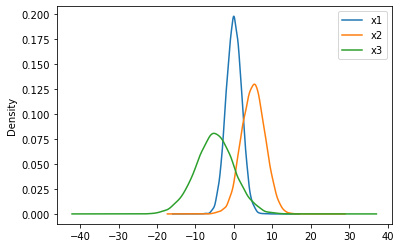

In [10]:
# plotting data

df.plot.kde()

In [11]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()

In [12]:
data_tf = standardscaler.fit_transform(df)

In [13]:
data_tf

array([[ 1.67194324, -0.21398462,  0.03270303],
       [-0.0744121 , -1.55288133,  0.09360227],
       [-1.78811701, -1.64725755,  1.28382738],
       ...,
       [ 1.63452066,  0.91093205,  0.18366764],
       [-1.43191386,  0.31543575, -0.62312946],
       [ 0.64256594,  0.63357146, -0.17176556]])

In [14]:
df = pd.DataFrame(data_tf, columns=['x1','x2','x3'])

<AxesSubplot:ylabel='Density'>

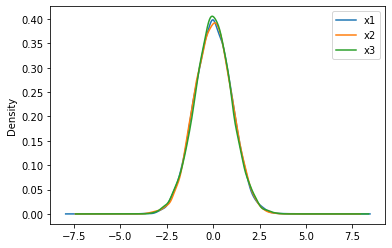

In [15]:
df.plot.kde()

## MinMaxScaler
* One of the most popular
* Calculate - Subtract min of column & div by difference between max & min




<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp3.PNG?raw=true">



* Data shifts between 0 & 1
* If distribution not suitable for StandardScaler, this scaler works out.
* Sensitive to outliers

In [16]:
df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

<AxesSubplot:ylabel='Density'>

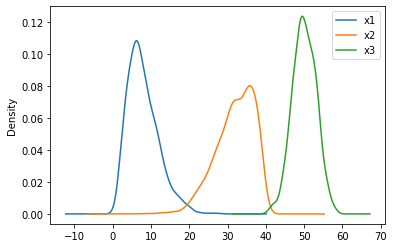

In [17]:
df.plot.kde()

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
minmax = MinMaxScaler()
data_tf = minmax.fit_transform(df)

<AxesSubplot:ylabel='Density'>

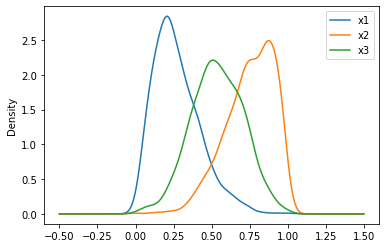

In [20]:
df = pd.DataFrame(data_tf,columns=['x1','x2','x3'])
df.plot.kde()

## Robust Scaler
* Suited for data with outliers
* Calculate by subtracting 1st-quartile & div by difference between 3rd-quartile & 1st-quartile






<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp2.PNG?raw=true">

In [21]:
df = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})

<AxesSubplot:ylabel='Density'>

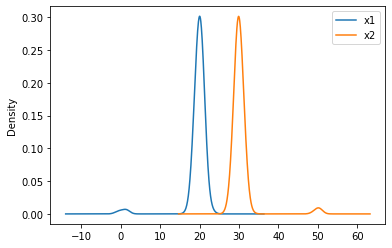

In [22]:
df.plot.kde()

In [23]:
from sklearn.preprocessing import RobustScaler
robustscaler = RobustScaler()

In [24]:
data_tf = robustscaler.fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','x2'])

<AxesSubplot:ylabel='Density'>

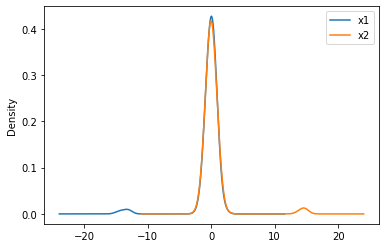

In [25]:
df.plot.kde()

In [26]:
df = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})

In [27]:
standardscaler = StandardScaler()

In [28]:
data_tf = standardscaler.fit_transform(df)

In [29]:
df = pd.DataFrame(data_tf, columns=['x1','x2'])

<AxesSubplot:ylabel='Density'>

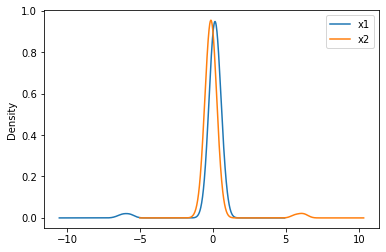

In [30]:
df.plot.kde()

## Log Transformation

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.DataFrame({
    'Income': [15000, 1800, 120000, 10000],
    'Age': [25, 18, 42, 51],
    'Department': ['HR','Legal','Marketing','Management']
})

<AxesSubplot:ylabel='Frequency'>

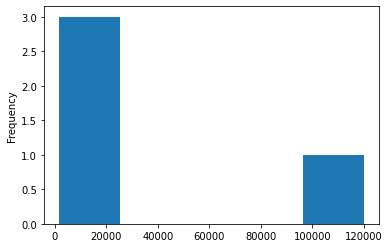

In [35]:
df['Income'].plot.hist(bins = 5)

In [36]:
# Log Transform
df['log_income'] = np.log(df['Income'])
# We created a new column to store the log values
df

,Income,Age,Department,log_income
0,15000,25,HR,9.615805
1,1800,18,Legal,7.495542
2,120000,42,Marketing,11.695247
3,10000,51,Management,9.210340


Income column had extreme values ranging from 1800 to 1,20,000 – the log values are now ranging from approximately 7.5 to 11.7

<AxesSubplot:ylabel='Frequency'>

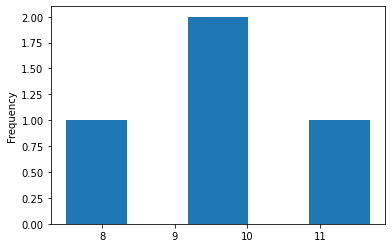

In [37]:
df['log_income'].plot.hist(bins = 5)